In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn


In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
bos = pd.DataFrame(boston.data)

In [3]:
#Loading the dataset
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
bos.columns


RangeIndex(start=0, stop=13, step=1)

In [5]:
bos.keys

<bound method NDFrame.keys of            0     1      2    3      4      5     6       7    8      9    10  \
0    0.00632  18.0   2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1    0.02731   0.0   7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2    0.02729   0.0   7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3    0.03237   0.0   2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4    0.06905   0.0   2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   
..       ...   ...    ...  ...    ...    ...   ...     ...  ...    ...   ...   
501  0.06263   0.0  11.93  0.0  0.573  6.593  69.1  2.4786  1.0  273.0  21.0   
502  0.04527   0.0  11.93  0.0  0.573  6.120  76.7  2.2875  1.0  273.0  21.0   
503  0.06076   0.0  11.93  0.0  0.573  6.976  91.0  2.1675  1.0  273.0  21.0   
504  0.10959   0.0  11.93  0.0  0.573  6.794  89.3  2.3889  1.0  273.0  21.0   
505  0.04741   0.0  11.93  0.0  0.573  6.030  80.8  2.5050  1.0  273.0  21.0   

         

In [6]:
#The column names are not available here. We can see if the column names or feature names are available in the original data
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

## Let's see the description of each  of the column names

CRIM - per capita crime rate by town

ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS - proportion of non-retail business acres per town.

CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

NOX - nitric oxides concentration (parts per 10 million)

RM - average number of rooms per dwelling

AGE - proportion of owner-occupied units built prior to 1940

DIS - weighted distances to five Boston employment centres

RAD - index of accessibility to radial highways

TAX - full-value property-tax rate per $10,000

PTRATIO - pupil-teacher ratio by town

B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT - % lower status of the population


In [7]:
#Now we can add these column names to the data provided here. 
bos.columns = ['0','1','2','3','4','5','6','7','8','9','10','11','12']
col_dict = bos.columns.to_list()

In [8]:
col_dict

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12']

In [9]:
feature_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']

In [10]:
col_dict = feature_names

In [11]:
col_dict


['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [12]:
#Now we can update the column names to the data provided

bos.columns = col_dict

In [13]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [14]:
#We can see that the target value MEDV is missing from the data. We create a new column of target values and add it to the dataframe.
bos['Price'] = boston.target

In [15]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [16]:
#Now let's do some EDA
bos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


### There appears to be no missing values

In [17]:
bos.shape
print("There are %d rows" %(bos.shape[0]) + " and %d columns" %(bos.shape[1])) 


There are 506 rows and 14 columns


In [18]:
#Check the statistics of the data
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Data Visualization

c:\users\leo26\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


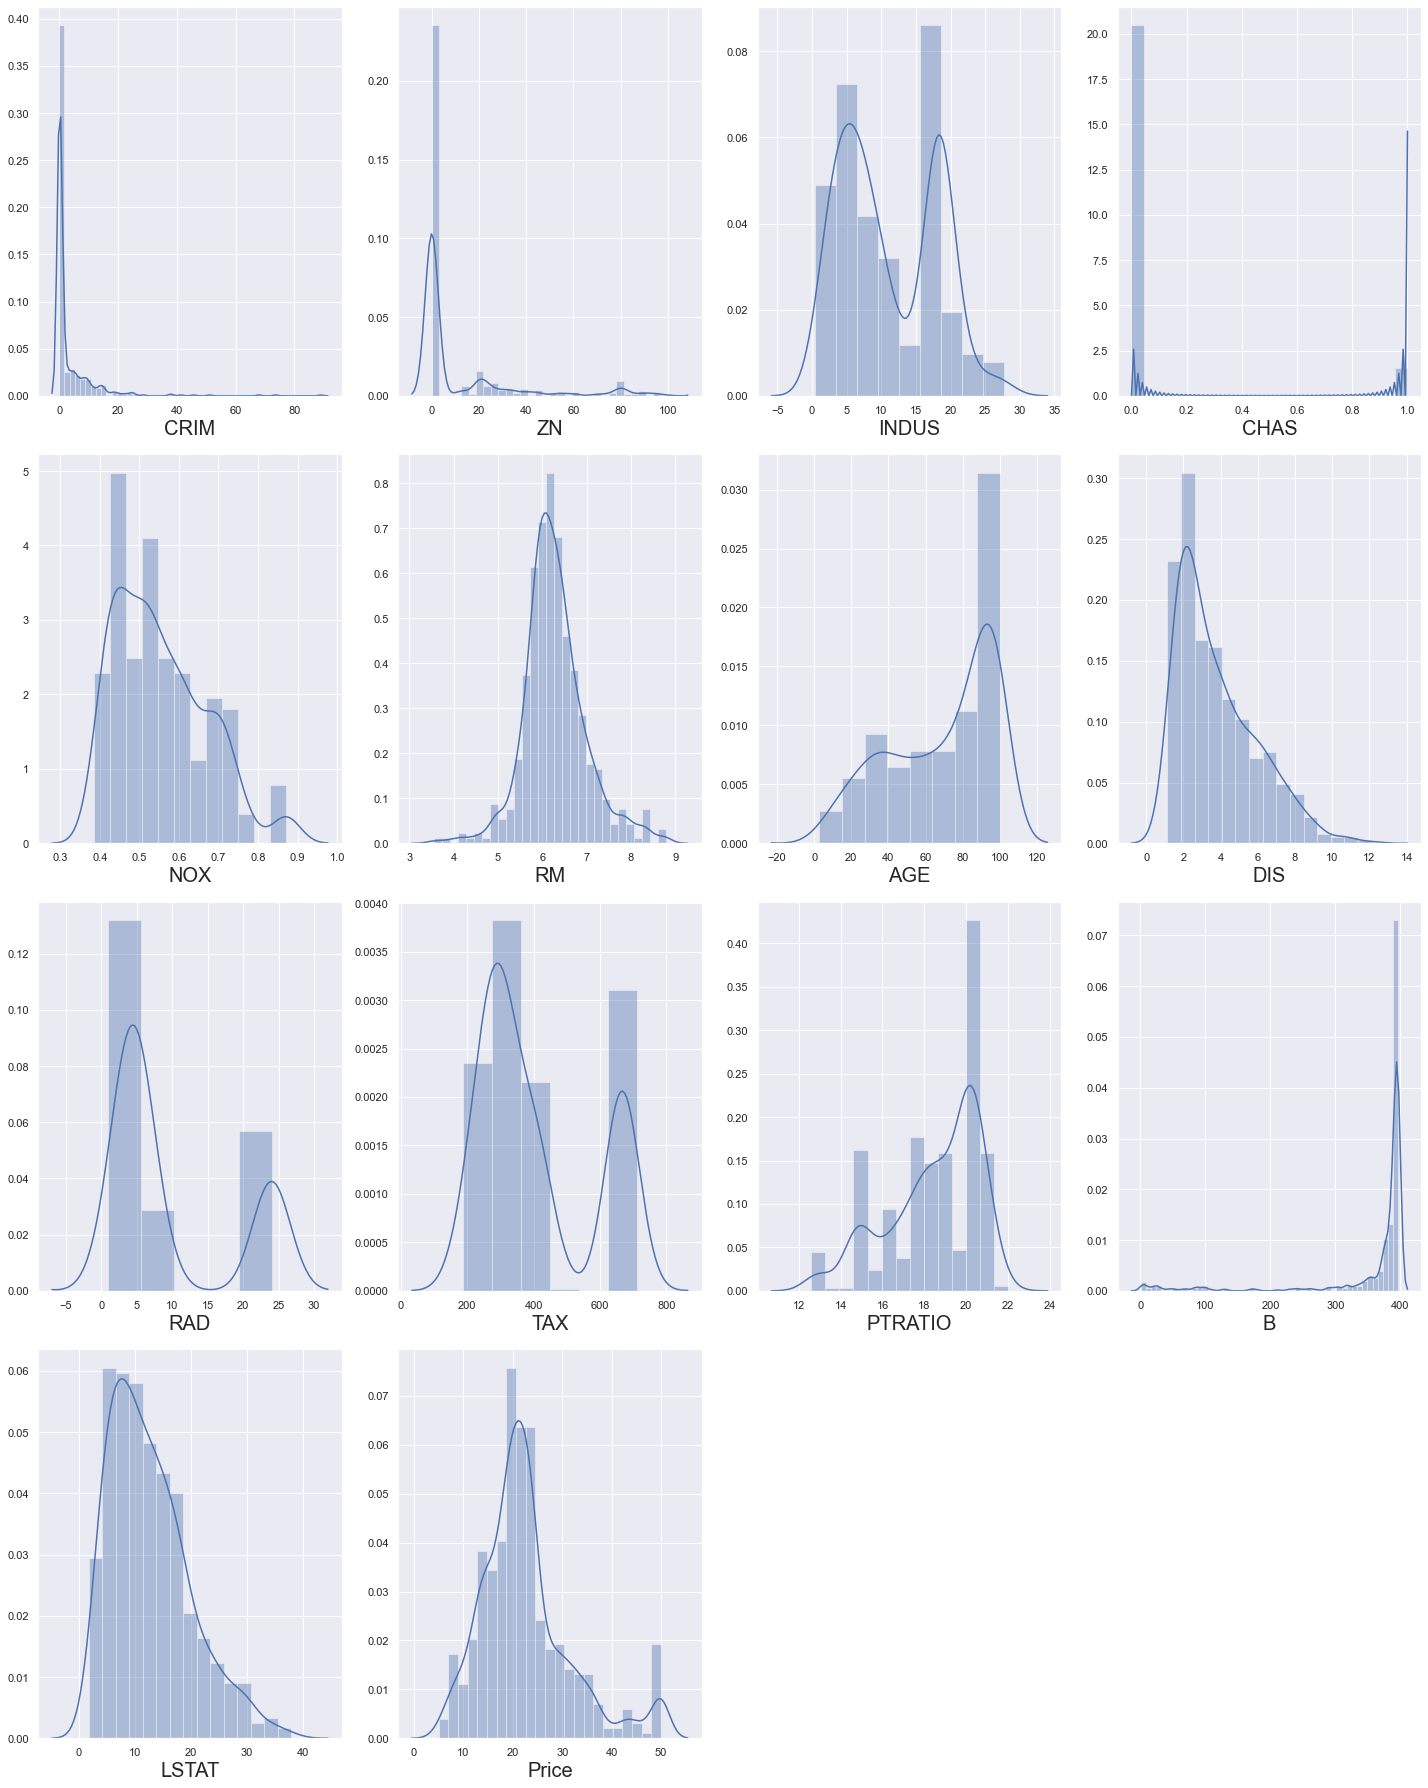

In [19]:
#Let's visualize the data and see how data is distributed for every column

import seaborn as sns
sns.set()
plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in bos:
    if plotnumber<=16 :
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(bos[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.tight_layout()

### The column 'Price' seems to be normally distributed with some outliers. 

Let's check for the presence of any outliers. 

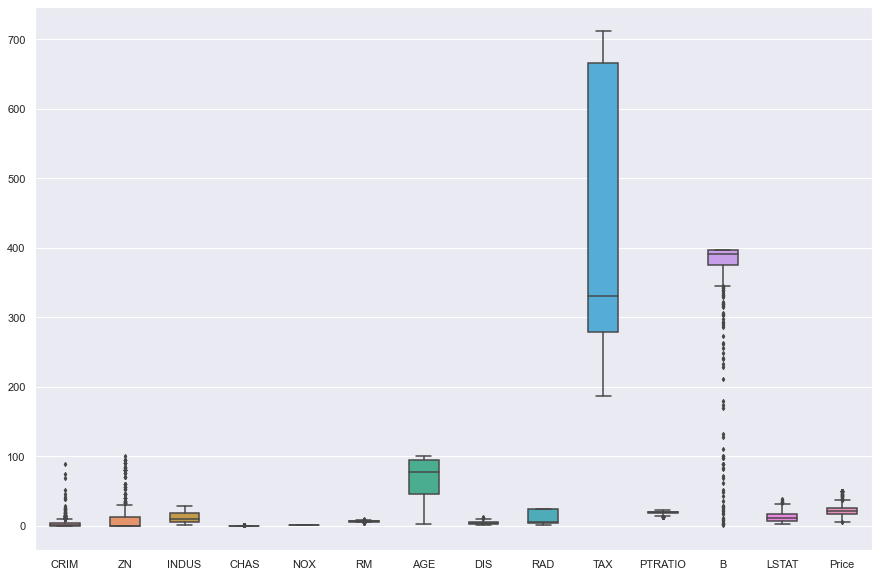

In [20]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=bos, width= 0.5,ax=ax,  fliersize=3)


Let's see the correlation between each of the feature with 'MEDV'

In [21]:
y = bos['Price']
X =bos.drop(columns = ['Price'])

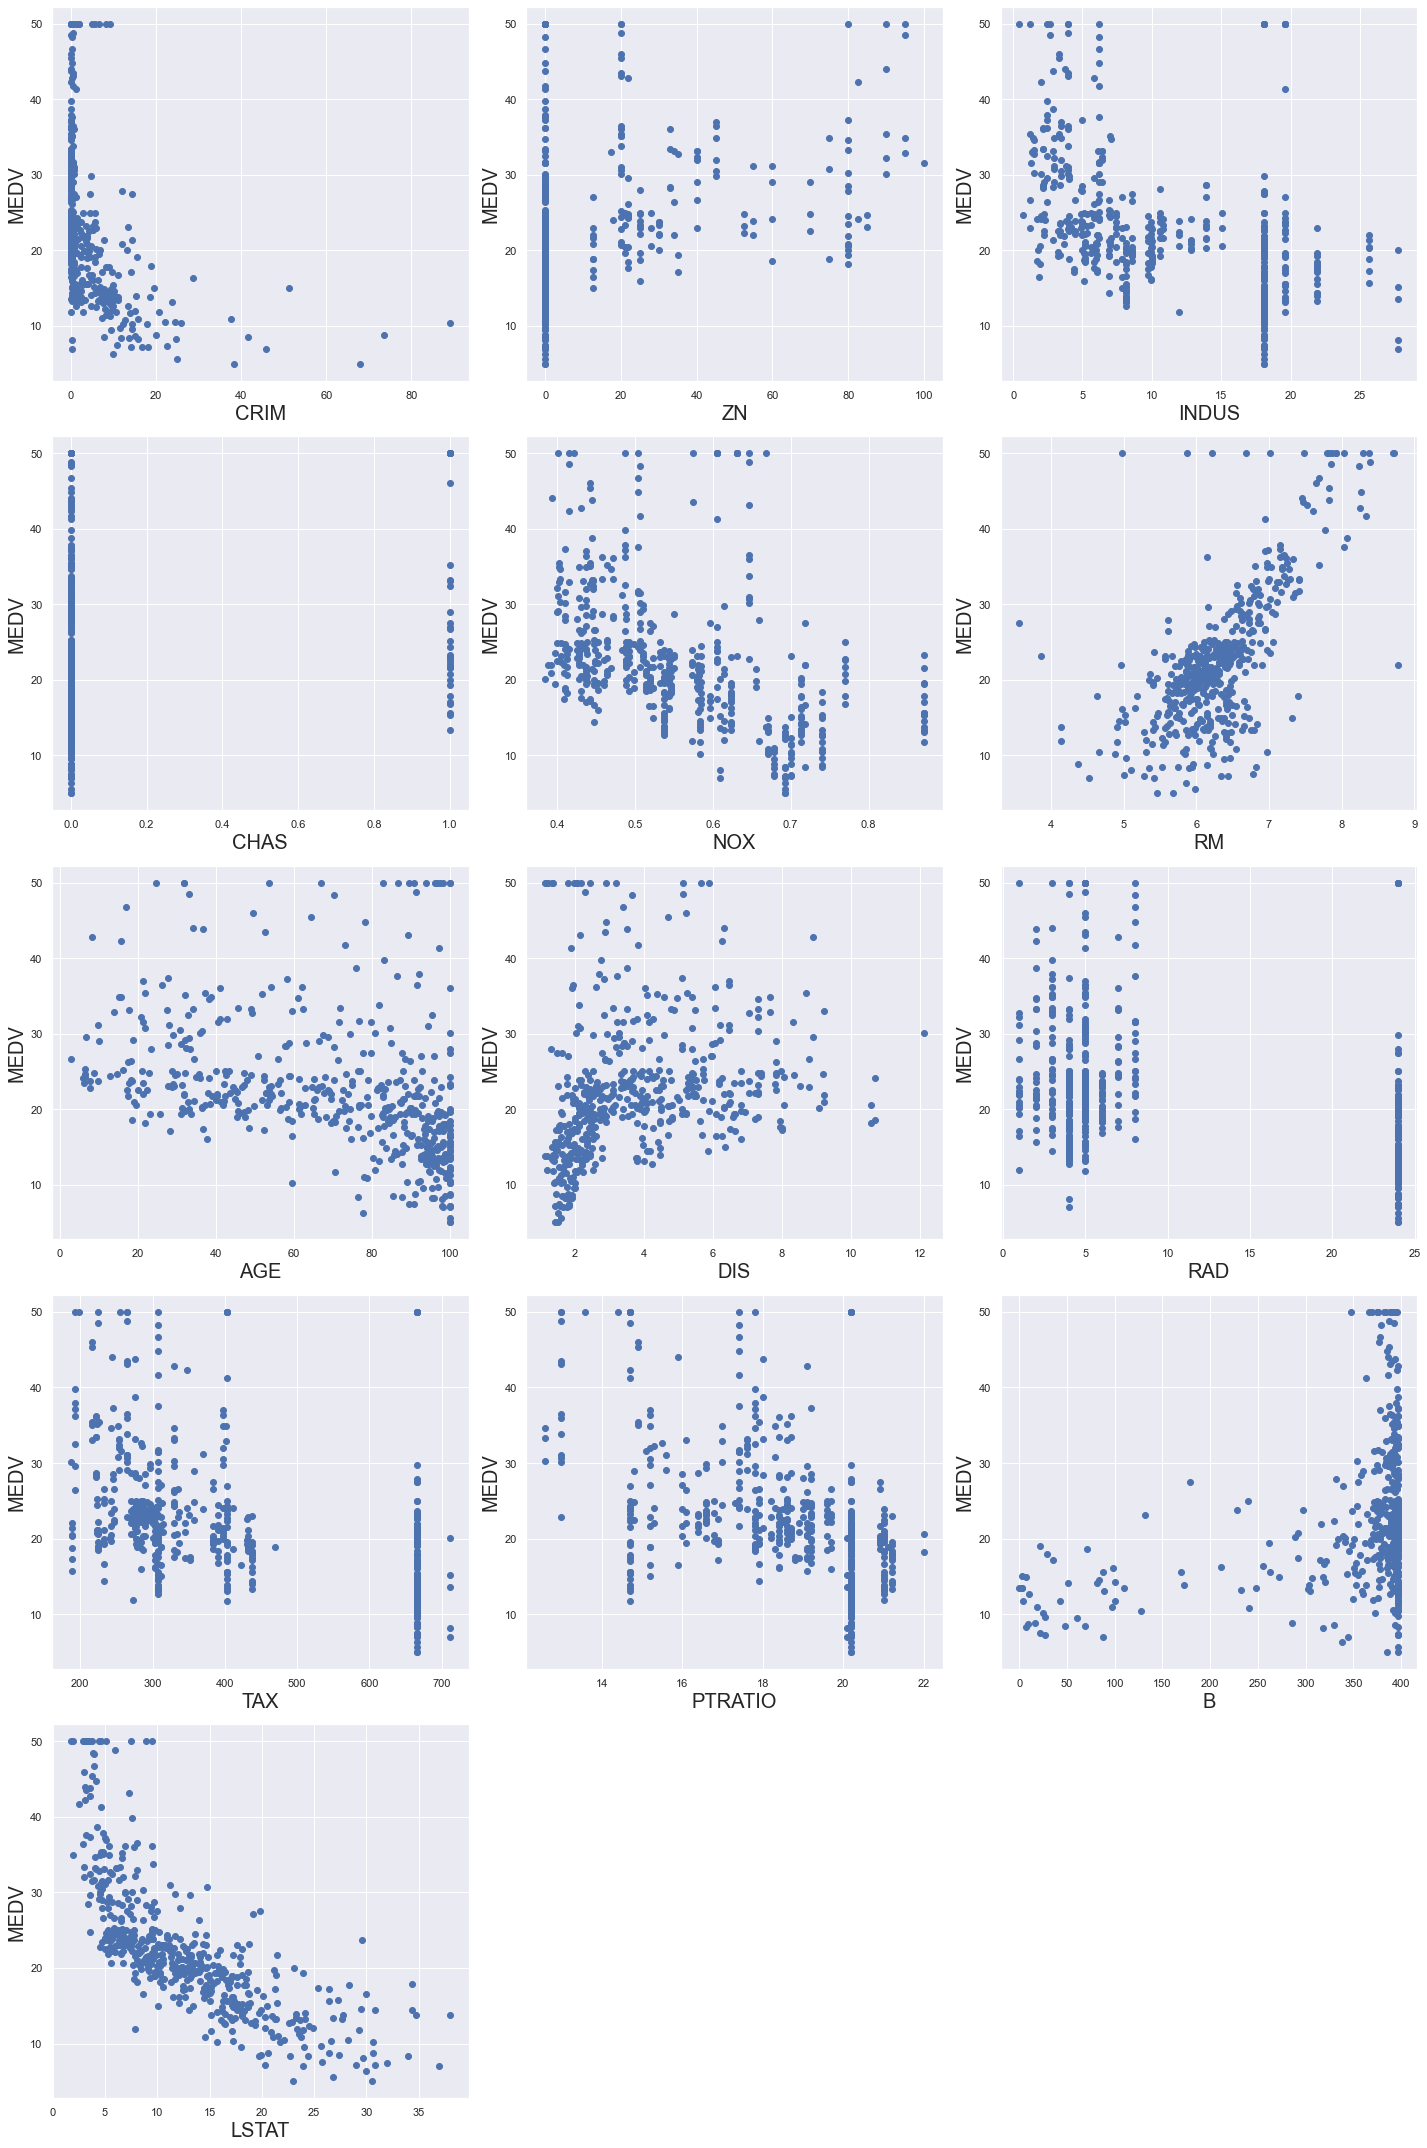

In [22]:
plt.figure(figsize=(20,30), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('MEDV',fontsize=20)
    plotnumber+=1
plt.tight_layout()

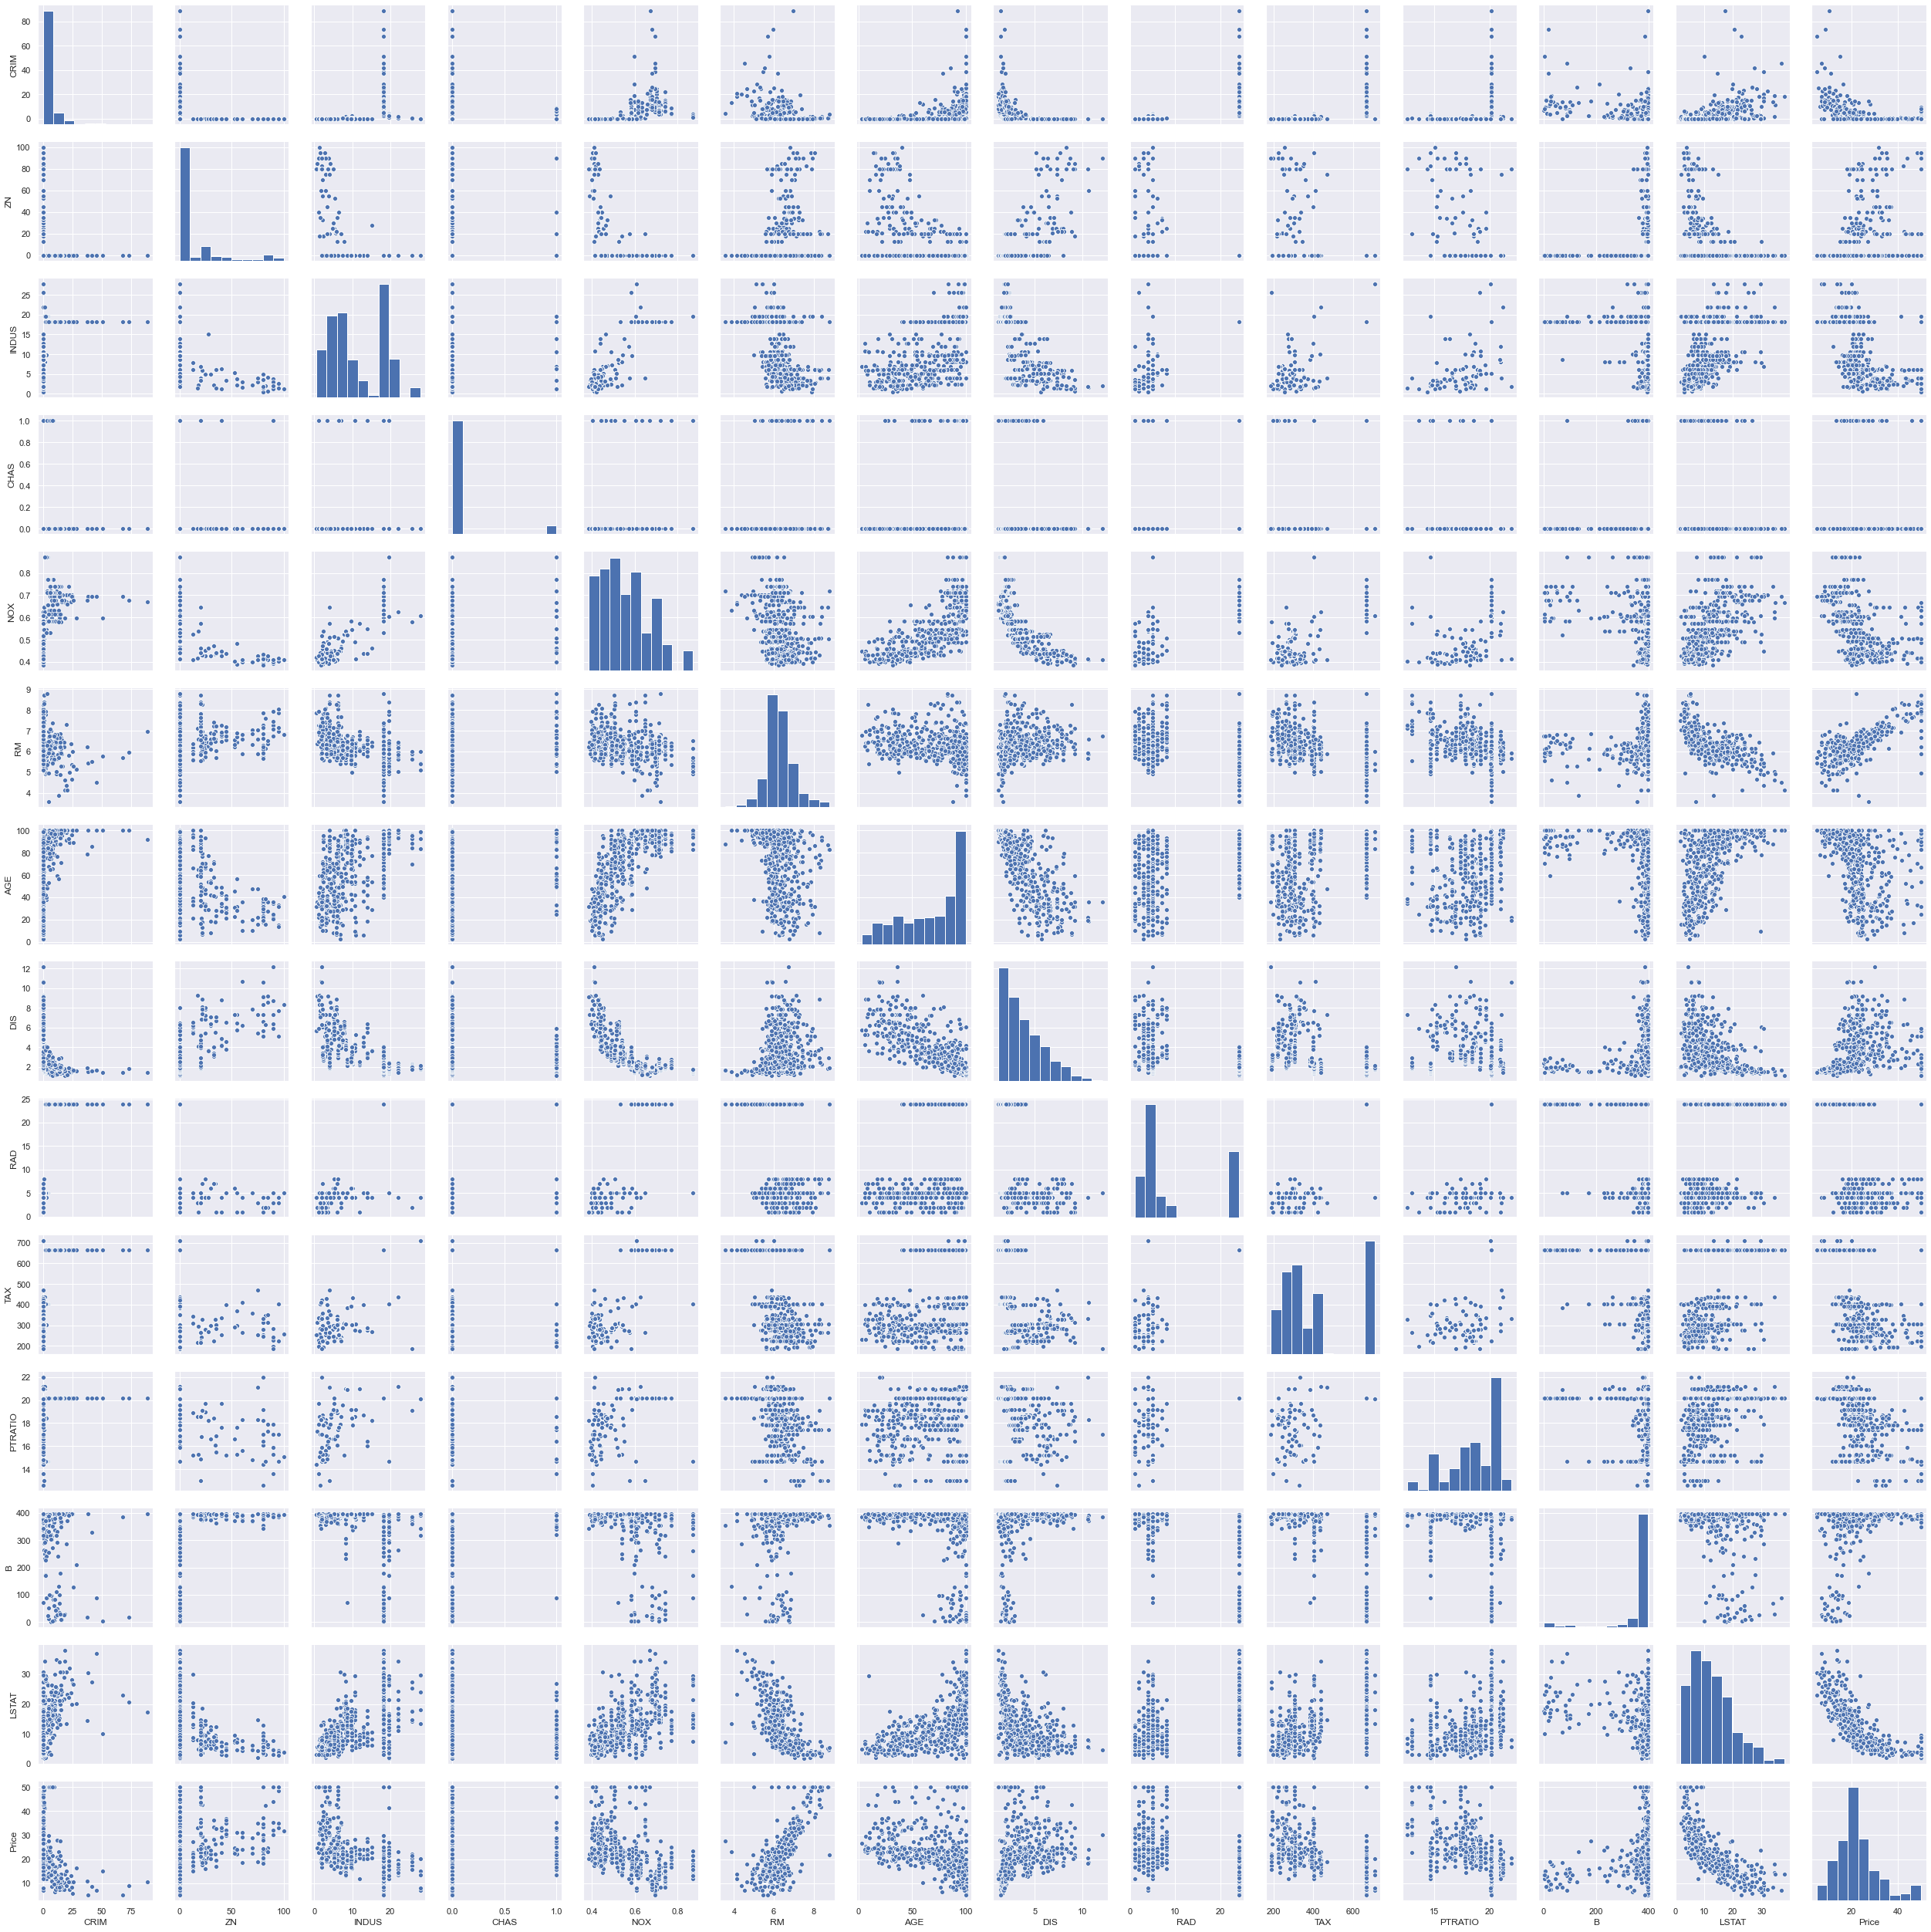

In [23]:
#Let's use pairplot to get a better understanding of the data

sns.pairplot(bos)
#We can check the features with the highest correlation with respect to MEDV and then do pairplot only on those variables. 

'Draw the heatmap with the mask and correct aspect ratio'

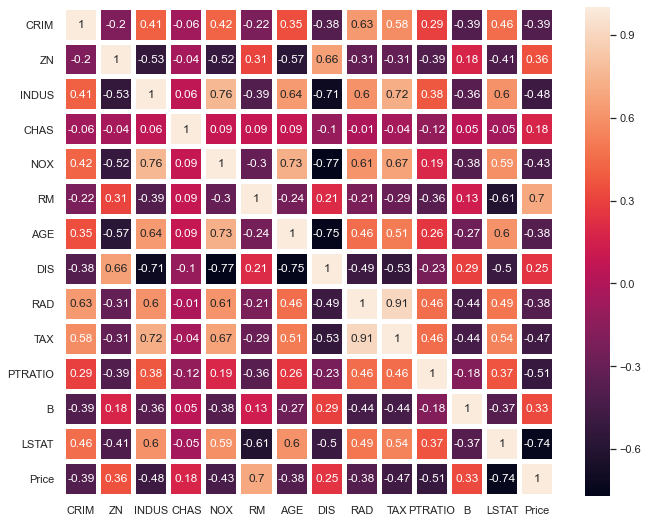

In [24]:
#Let's now create a correlation matrix that measures the linear relationships between the variables. 
correlation_matrix = bos.corr().round(2)
# annot = True to print the values inside the square
f , ax = plt.subplots(figsize=(11,9))
sns.heatmap(data=correlation_matrix, annot=True, linewidths = 4)
"""Draw the heatmap with the mask and correct aspect ratio"""
#sns.heatmap(corr , mask = mask , cmap=cmap , vmax=.3, center=0 , annot=True,
 #          square = True , linewidths=5 , cbar_kws={'shrink':.5});


Some observations:
 By looking at the correlation matrix we can see that RM has a strong positive correlation with Price (0.7) where as LSTAT has a high negative correlation with Price(-0.74).

An important point in selecting features for a linear regression model is to check for multi-co-linearity. The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model. Same goes for the features DIS and AGE which have a correlation of -0.75.

In [25]:
correlation_matrix.index

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'Price'],
      dtype='object')

In [26]:
def getCorrleatedFeature(corrdata,threshold):
    feature =[]
    value = []
    
    for i, index in enumerate(corrdata.index):
        if abs(corrdata[index])>threshold:
            feature.append(index)
            value.append(corrdata[index])
            
    df = pd.DataFrame(data = value, index = feature, columns = ['Corr Value'])
    return df
    

In [27]:
threshold = 0.50
corr_value = getCorrleatedFeature(correlation_matrix['Price'],threshold)
corr_value

,Corr Value
RM,0.70
PTRATIO,-0.51
LSTAT,-0.74
Price,1.00


In [28]:
#Let's proceed by checking multicollinearity in the dependent variables. Before that, we should scale our data. 
#Let's use the standard scaler for that


from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score


scalar = StandardScaler()
X_scaled = scalar.fit_transform(X)

In [29]:
X_scaled

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [30]:
#Let's check for multicollinearity using VIF

vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(X_scaled,i) for i in range(X_scaled.shape[1])]
vif["Features"] = X.columns

#let's check the values
vif

,vif,Features
0,1.792192,CRIM
1,2.298758,ZN
2,3.991596,INDUS
3,1.073995,CHAS
4,4.393720,NOX
5,1.933744,RM
6,3.100826,AGE
7,3.955945,DIS
8,7.484496,RAD
9,9.008554,TAX


Here, we have the correlation values for all the features. As a thumb rule, a VIF value greater than 5 means a very severe multicollinearity. RAD and TAX have VIF more than 5. 

The features which we are interested in are 'CRIM','RM','AGE','LSTAT','DIS','ZN','PTRATIO.
Let's split our data accordingly



In [31]:
X1= bos[['CRIM','RM','AGE','LSTAT','DIS','ZN','PTRATIO']]
y1 = bos['Price'] 

In [32]:
# Using GridSearchCV to find the best algorithm for this problem
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [33]:
# Creating a function for GridSearchCV

def find_best_model(X,y):
    models = {
        'linear_regression': {
            'model': LinearRegression(),
            'parameters': {
                'normalize': [True,False]
            }
        },
        
        'lasso': {
            'model': Lasso(),
            'parameters': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'parameters': {
                'criterion': ['mse', 'friedman_mse'],
                'splitter': ['best', 'random']
            }
        }
    }
    
    scores = []
    cv_X_y = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
    
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv=cv_X_y, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model': model_name,
            'best_parameters': gs.best_params_,
            'accuracy': gs.best_score_
        })
        
    return pd.DataFrame(scores, columns=['model', 'best_parameters', 'accuracy'])

find_best_model(X1, y1)

,model,best_parameters,accuracy
0,linear_regression,{'normalize': True},0.655622
1,lasso,"{'alpha': 1, 'selection': 'cyclic'}",0.595634
2,decision_tree,"{'criterion': 'mse', 'splitter': 'random'}",0.736163


#### Here, we see that decision tree has the highest accuracy. But for the purpose of this assignment let;s use Linear Regression.

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test , y_train , y_test = train_test_split(X1,y1,test_size=0.30 , random_state = 0)

In [36]:
print(X_train)
print(y_train)
print(X_test)
print(y_test)

        CRIM     RM    AGE  LSTAT     DIS    ZN  PTRATIO
141  1.62864  5.019  100.0  34.41  1.4394   0.0     21.2
272  0.11460  6.538   58.7   7.73  3.9175  20.0     18.6
135  0.55778  6.335   98.2  16.96  2.1107   0.0     21.2
298  0.06466  6.345   20.1   4.97  7.8278  70.0     14.8
122  0.09299  5.961   92.9  17.93  2.0869   0.0     19.1
..       ...    ...    ...    ...     ...   ...      ...
323  0.28392  5.708   74.3  11.74  4.7211   0.0     19.6
192  0.08664  7.178   26.3   2.87  6.4798  45.0     15.2
117  0.15098  6.021   82.6  10.30  2.7474   0.0     17.8
47   0.22927  6.030   85.5  18.80  5.6894   0.0     17.9
172  0.13914  5.572   88.5  14.69  2.5961   0.0     16.6

[354 rows x 7 columns]
141    14.4
272    24.4
135    18.1
298    22.5
122    20.5
       ... 
323    18.5
192    36.4
117    19.2
47     16.6
172    23.1
Name: Price, Length: 354, dtype: float64
         CRIM     RM    AGE  LSTAT     DIS   ZN  PTRATIO
329   0.06724  6.333   17.2   7.34  5.2146  0.0     16.9
371  

In [37]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

regression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [38]:
#Let's check the intercepts and coefficients

regression.intercept_

26.009416843722367

In [39]:
regression.coef_

array([-0.12876368,  4.30487923, -0.0304857 , -0.55281072, -1.0683153 ,
        0.03535721, -0.94221301])

In [40]:
# saving the model to the local file system
import pickle
filename = 'final_model.pickle'
pickle.dump(regression, open(filename, 'wb'))

In [41]:
# prediction using the saved model

loaded_model = pickle.load(open(filename, 'rb'))
y_pred=loaded_model.predict(X_test)
y_pred

array([27.18733738, 22.98123487, 25.76295153, 11.13513247, 21.39536483,
       20.04615199, 20.45519495, 20.60034114, 18.91010727, 22.4804482 ,
        6.77908599, 17.41401018, 18.47740477,  3.61248743, 39.27422705,
       33.55542463, 21.53011209, 37.22725316, 31.23799769, 22.77587883,
       24.75839693, 25.00517292, 20.02239303, 29.35826472, 21.45860563,
        9.83396033, 17.14073832, 22.99289275, 35.39187271, 20.35681025,
       17.05083056, 18.67648351, 18.93656383, 22.04554709, 27.58862908,
       18.5730414 ,  9.9803457 , 22.35611114, 18.64127884, 14.03142919,
       26.11668995, 19.74130044, 24.24779823, 13.76988576, 25.88208949,
       24.11169767, 18.56465483, 25.20740186, 12.29660599, 24.6460949 ,
       25.50124158, 18.70730088, 22.85460641, 32.56930468, 15.61678145,
       21.77222397, 21.04909982, 16.51849015, 15.02845402, 17.62213167,
       19.89657467, 21.82207034, 32.99259874, 31.42696071, 16.98226377,
       33.19881827, 19.61393817, 18.592944  , 19.06583581, 22.92

#### Let's see what is the predicted and actual value for the test data

In [42]:
df1 = pd.DataFrame(data=[y_pred,y_test])
df1.T
#Adding .T will transpose the columns

,0,1
0,27.187337,22.6
1,22.981235,50.0
2,25.762952,23.0
3,11.135132,8.3
4,21.395365,21.2
...,...,...
147,28.072967,36.2
148,16.342964,11.0
149,5.982543,7.2
150,28.603126,22.8


In [43]:
regression.score(X_train,y_train)

0.7339584295281326

In [44]:
def adj_r2(x,y):
    r2 = regression.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [45]:
adj_r2(X_train,y_train)

0.728576085616852

Our r2 score is 73.4% and adj r2 is 72.85% for our training set, so looks like we are not being penalized by use of any feature.

Let's check how well the model fits the test data.

Now let's check if our model is overfitting our data using regularization.

In [46]:
regression.score(X_test,y_test)

0.6180672530385872

In [47]:
adj_r2(X_test,y_test)

0.5995010778390741

So it looks like our model r2 score is less on the test data.

Let's see if our model is overfitting our training data.

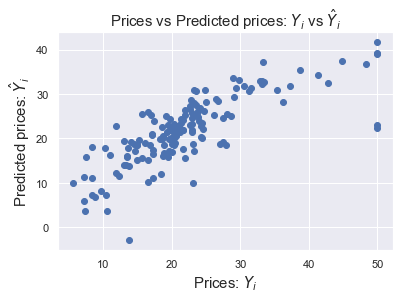

In [48]:
#Plotting Prediction
pred=regression.predict(X_test)
plt.scatter(y_test, pred)
plt.xlabel("Prices: $Y_i$" , fontsize = 15)
plt.ylabel("Predicted prices: $\hat{Y}_i$" , fontsize = 15)
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$" , fontsize = 15)
plt.show()

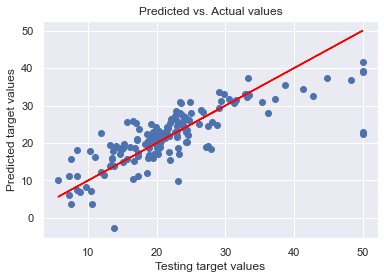

In [49]:
#Plotting the regression line that best fits the model for predicition
fig, ax = plt.subplots()
ax.scatter(y_test, pred)
ax.plot(y_test, y_test, color='red')
ax.set_xlabel('Testing target values')
ax.set_ylabel('Predicted target values')
ax.set_title('Predicted vs. Actual values');


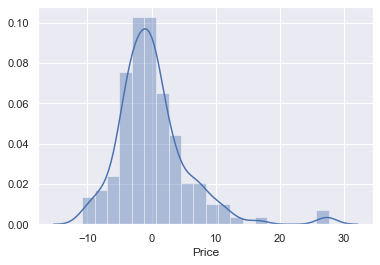

In [50]:

sns.distplot(y_test - pred)

In [51]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(X_train, y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=100000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [52]:
# best alpha parameter
alpha = lasscv.alpha_
alpha

0.0003637164386329405

In [53]:
#now that we have best parameter, let's use Lasso regression and see how well our data has fitted before

lasso_reg = Lasso(alpha)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.0003637164386329405, copy_X=True, fit_intercept=True,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [54]:
lasso_reg.score(X_test, y_test)

0.6180732954856336

our r2_score for test data (61.8%) comes same as before using regularization. So, it is fair to say our OLS model did not overfit the data.

In [55]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([7.82114947e+00, 7.38070328e+00, 3.60841408e-01, 6.09418638e+00,
       3.31224600e+00, 2.36267570e+00, 7.74362671e+00, 7.43335086e+00,
       7.94891366e+00, 6.22243519e+00, 2.50174350e+00, 8.66826586e+00,
       5.17868580e+00, 7.52869580e+00, 7.11458193e+00, 1.66092238e+00,
       3.88805223e+00, 9.39598834e+00, 2.35605849e+00, 5.72947978e+00,
       6.08309375e+00, 8.38994951e+0...
       1.55476239e+00, 8.52346108e+00, 6.81437663e+00, 7.34164343e+00,
       7.99494773e+00, 7.96676739e+00, 7.11470432e+00, 8.37026290e+00,
       8.30168164e+00, 7.30685475e+00, 9.98581036e-01, 7.09447958e+00,
       4.94243207e-01, 6.67982550e+00, 4.91017414e-01, 4.15177025e+00,
       8.65357055e+00, 9.52546368e+00]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [56]:
ridgecv.alpha_

0.00767462021945553

In [57]:
ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.00767462021945553, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [58]:
ridge_model.score(X_test, y_test)

0.6180680779434418

In [59]:
# Elastic net

elasticCV = ElasticNetCV(alphas = None, cv =10)

elasticCV.fit(X_train, y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [60]:
elasticCV.alpha_

0.20155262424590634

In [61]:
# l1_ration gives how close the model is to L1 regularization, below value indicates we are giving equal
#preference to L1 and L2
elasticCV.l1_ratio

0.5

In [62]:
elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(X_train, y_train)

ElasticNet(alpha=0.20155262424590634, copy_X=True, fit_intercept=True,
           l1_ratio=0.5, max_iter=1000, normalize=False, positive=False,
           precompute=False, random_state=None, selection='cyclic', tol=0.0001,
           warm_start=False)

In [63]:
elasticnet_reg.score(X_test, y_test)

0.6151445635643993

### So, we can see by using different type of regularization, we still are getting the same r2 score OF 61%. That means our OLS model has been well trained over the training data and there is no overfitting.

In [64]:
#The Mean Squared Error (MSE) or Residual Sum of Squares

mse = sklearn.metrics.mean_squared_error(y_test, pred)
print(mse)
# print "The Mean Squared Error (MSE) %.2f" %np.mean((LineReg.predict(x_test)-y_test)**2)

31.801821770294378


In [65]:
print('variance score is %2.f'%regression.score(X_test , y_test ))
# The closer the number is to one (1) , the better the accuracy of the model

variance score is  1


Now to be sure of our predictions we need to check for r2.
Now lets check the r2 rules

r2 < 0.19 - Very weak correlation

0.20 - 0.39 - weak correlation

0.4 - 0.59 - Moderate

0.6 - 0.79 - Strong correlation

### Evaluation Metrics

We use three evaluation metrics. All of these are loss functions, because we want to minimize them.

Mean Absolute Error (MAE), Mean Squared Error (MSE) and Root Mean Squared Error (RMSE).

In [85]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

MAE: 3.864212395528494
MSE: 31.801821770294378
RMSE: 5.639310398470222
